In [81]:
import pandas as pd
from pathlib import Path
import statsmodels.formula.api as sm
import numpy as np

In [82]:
interim = '../data/interim'
br = pd.read_pickle(Path(interim) / 'batting_records.pkl')

In [69]:
br = br.sort_values(['BAT_ID', 'year'])
br_pred = br.loc[:, ['BAT_HAND', 'G', 'BBPG', 'ABPG', 'HPG', 'HPPA']].groupby('BAT_ID').shift(1)
br_pred = br_pred.dropna(subset=['G'])

br_pred['w_HPPA'] = br_pred['HPPA'] * br_pred['G']

br_pred['sum_w_HPPA'] = br_pred.groupby('BAT_ID')['w_HPPA'].transform(lambda x: x.rolling(5, 1).mean())
br_pred['sum_G'] = br_pred.groupby('BAT_ID')['G'].transform(lambda x: x.rolling(5, 1).mean())
br_pred['pred_HPPA'] = (br_pred['sum_w_HPPA'] / br_pred['sum_G'])

del br_pred['HPPA']

br_pred = br_pred.rename(columns={'G': 'prev_G'})

In [70]:
merged = pd.merge(br, br_pred, on=['BAT_ID', 'year'])
merged['HPPA'] = merged['HPPA'].astype('float')
merged['pred_HPPA'] = merged['pred_HPPA'].astype('float')

In [78]:
limited = merged[(merged.G >= 50) & (merged.prev_G >= 50)]
result = sm.ols(formula="HPPA ~ pred_HPPA", data=limited).fit()

In [79]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   HPPA   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     8025.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:15:04   Log-Likelihood:                 46840.
No. Observations:               21755   AIC:                        -9.368e+04
Df Residuals:                   21753   BIC:                        -9.366e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0741      0.002     40.291      0.0

<AxesSubplot:xlabel='HPPA', ylabel='pred_HPPA'>

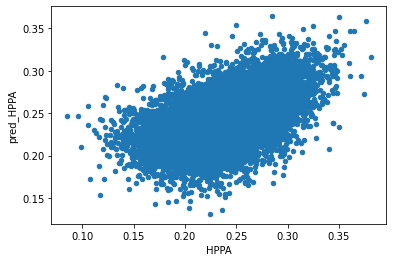

In [80]:
limited.plot.scatter(x='HPPA', y='pred_HPPA')

In [ ]:
br = br.sort_values(['BAT_ID', 'year'])
br_pred = br.loc[:, ['BAT_HAND', 'G', 'BBPG', 'ABPG', 'HPG', 'HPPA']].groupby('BAT_ID').shift(1)
br_pred = br_pred.dropna(subset=['G'])

br_pred['w_HPPA'] = br_pred['HPPA'] * br_pred['G']

br_pred['sum_w_HPPA'] = br_pred.groupby('BAT_ID')['w_HPPA'].transform(lambda x: x.rolling(5, 1).mean())
br_pred['sum_G'] = br_pred.groupby('BAT_ID')['G'].transform(lambda x: x.rolling(5, 1).mean())
br_pred['pred_HPPA'] = (br_pred['sum_w_HPPA'] / br_pred['sum_G'])

del br_pred['HPPA']

br_pred = br_pred.rename(columns={'G': 'prev_G'})

In [83]:
br = br.sort_values(['BAT_ID', 'year'])
br_pred = br.loc[:, ['BAT_HAND', 'G', 'BBPG', 'ABPG', 'HPG', 'HPPA']].groupby('BAT_ID').shift(1)
br_pred = br_pred.dropna(subset=['G'])

In [95]:
br_pred.loc[[1,2], 'G'].rolling(2, 2).apply(lambda x: print(x))

BAT_ID    year
aardd001  2008      NaN
          2015      2.0
aaroh101  1955     59.0
          1956    129.0
          1957    141.0
                  ...  
zuvep001  1985      5.5
          1986     37.0
          1987     43.0
          1988     16.5
          1989     30.0
Name: G, Length: 55566, dtype: float64

In [148]:
def marcel(x):
    if len(x) == 1:
        return x[0]
    if len(x) == 2:
        return x[1]*(5/9) + x[0]*(4/9)
    else:
        return x[2]*(5/12) + x[1]*(4/12) + x[0]*(3/12)

In [149]:
br_pred['G'].head(10).groupby('BAT_ID').rolling(3, 1).apply(lambda x: marcel(x))

BAT_ID  
aardd001      3.000000
aardd001      1.888889
aaroh101    117.000000
aaroh101    130.333333
aaroh101    135.000000
aaroh101    145.166667
aaroh101    148.916667
aaroh101    152.166667
aaroh101    152.750000
aaroh101    153.833333
Name: G, dtype: float64